In [1]:
import numpy as np
from matplotlib import pyplot as plt
import time

In [2]:
# Get the movielens matrix
movielens = np.zeros((943,1682))
f = open("./ml-100k/u.data", "r")
for i in f.readlines():
    string = i.split()
    movielens[int(string[0])-1][int(string[1])-1] = int(string[2])
f.close()

In [3]:
# Get the no. of entries filled on each column
nz0 = np.count_nonzero(movielens, axis=0)

In [4]:
# Check for and delete the columns that there is only one or even no entry filled
while True:
  allOne = False
  notAllTwo1 = []
  allTwo = True

  # Check for each column
  for j in range(nz0.shape[0]):
    if nz0[j] < 2:
      notAllTwo1.append(j)
      allTwo = False
    
  # Start the division of the uncompleted R if all rows and columns have at least 2 entries filled
  if allTwo == True:
    break

  # Delete the columns that have only one or even no entry filled
  movielens = np.delete(movielens,notAllTwo1,axis=1)

  # Get the number of entries filled on each row and columns
  nz0 = np.count_nonzero(movielens, axis=0)

  # Check whether each of column has only one or even no entry filled 
  for j in range(nz0.shape[0]):
    if nz0[j] < 2:
      allOne = True
    else:
      allOne = False
      break
  
  # Give up to filling the matrix R if each row and column has only one or even no entry filled
  if allOne == True:
    break

# Save the matrix in a csv file
np.savetxt('movielens.csv', movielens, delimiter=',')

In [5]:
# Divide into 2 nearly equally distributed matrices that are mutually exclusive
allOne = False
while allOne == False:
    
  # copy the movielens into movielens2 first
  movielens2 = movielens.copy()
  movielens1 = np.zeros(movielens.shape)

    
  # randomly assign the entries to movielens1 and the corresponding entries in movielens2 are set to 0
  for j in range(movielens.shape[1]):
    i = np.random.choice(movielens[:, j].nonzero()[0], size=int(np.count_nonzero(movielens[:, j])/2), replace=False)
    movielens2[i,j] = 0
    movielens1[i,j] = movielens[i,j]
    
  # get the number of non-missing entries for each column
  nz1 = np.count_nonzero(movielens1, axis=0)
  nz2 = np.count_nonzero(movielens2, axis=0)
    
  # calculate the difference of the numbers of non-zero entries for each column between the 2 matrices
  diff_row = nz2 - nz1
    
  # randomly pick half of the columns whose difference is 1 
  ran = np.random.choice(diff_row.nonzero()[0], size=int(np.count_nonzero(diff_row)/2), replace=False)

  # reassign one of the entries for each of those columns to movielens1 and the corresponding entries in movielens2 are set to 0
  for j in ran:
    if(diff_row[j] == 1):  
      i = np.random.choice(movielens2[:, j].nonzero()[0], size=1, replace=False)
      movielens1[i,j] = movielens2[i,j]
      movielens2[i,j] = 0
    
  allOne = True
    
  # check whether each row and column of both movielens1 and movielens2 has at least one non-missing entries
  for j in range(movielens.shape[1]):
    if(not movielens1[:,j].any()):
      allOne = False
      break
    if(not movielens2[:,j].any()):
      allOne = False
      break
        
# Save the matrices in a csv file 
np.savetxt('movielens1.csv', movielens1, delimiter=',')
np.savetxt('movielens2.csv', movielens2, delimiter=',')

In [6]:
# get the position of non-missing entries in movielens1 and movielens2
X2, Y2 = movielens2.nonzero()
X1, Y1 = movielens1.nonzero()
    
# get the number of non-missing entries in movielens1 and movielens2
nz3 = np.count_nonzero(movielens2)
nz4 = np.count_nonzero(movielens1)
    
# No. of versions of P1
L = 5

# No. of rank
R = 2
    
# Get the mse at the nth iteration
iter_array = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]

# No. of iterations
T = 20

Set 1

Iteration: 1
learning rate: 0.040000
MAE of movielens2: 0.4772
MSE of movielens2: 6.0332
MAE of movielens1: 0.4821
MSE of movielens1: 6.0821

Iteration: 2
learning rate: 0.040000
MAE of movielens2: 0.2318
MSE of movielens2: 1.3674
MAE of movielens1: 0.2328
MSE of movielens1: 1.3755

Iteration: 3
learning rate: 0.025787

Iteration: 4
learning rate: 0.005888

Iteration: 5
learning rate: 0.005218
MAE of movielens2: 0.1896
MSE of movielens2: 0.9315
MAE of movielens1: 0.1909
MSE of movielens1: 0.9434

Iteration: 6
learning rate: 0.000525

Iteration: 7
learning rate: 0.000507

Iteration: 8
learning rate: 0.000193

Iteration: 9
learning rate: 0.000051

Iteration: 10
learning rate: 0.000012
MAE of movielens2: 0.1871
MSE of movielens2: 0.9088
MAE of movielens1: 0.1886
MSE of movielens1: 0.9233

Iteration: 11
learning rate: 0.000003

Iteration: 12
learning rate: 0.000001

Iteration: 13
learning rate: 0.000000

Iteration: 14
learning rate: 0.000000

Iteration: 15
learning rate: 0.000000

I

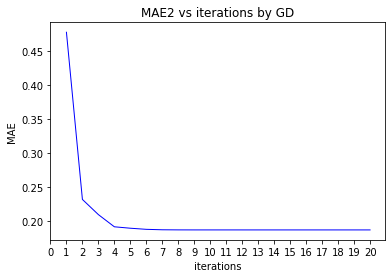

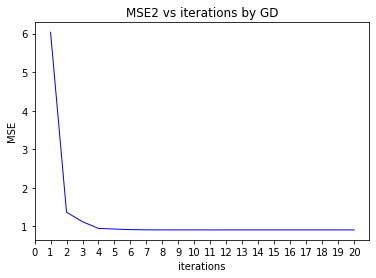

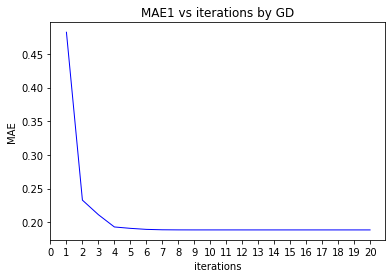

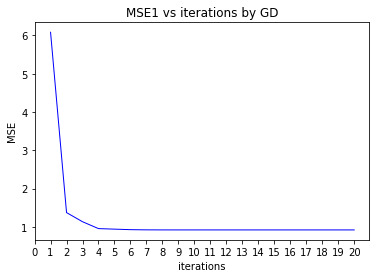

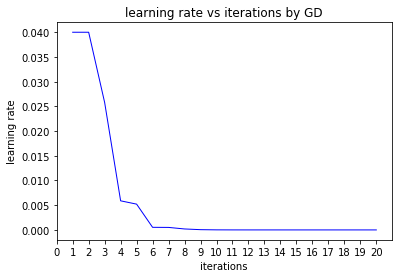

After constraining,
MAE of movielens2: 0.1776
MSE of movielens2: 0.9886
MAE of movielens1: 0.1788
MSE of movielens1: 1.0026

Set 2

Iteration: 1
learning rate: 0.040000
MAE of movielens2: 0.4747
MSE of movielens2: 5.9816
MAE of movielens1: 0.4794
MSE of movielens1: 6.0681

Iteration: 2
learning rate: 0.040000
MAE of movielens2: 0.2325
MSE of movielens2: 1.3747
MAE of movielens1: 0.2333
MSE of movielens1: 1.3813

Iteration: 3
learning rate: 0.025709

Iteration: 4
learning rate: 0.005871

Iteration: 5
learning rate: 0.005236
MAE of movielens2: 0.1902
MSE of movielens2: 0.9341
MAE of movielens1: 0.1917
MSE of movielens1: 0.9493

Iteration: 6
learning rate: 0.000532

Iteration: 7
learning rate: 0.000530

Iteration: 8
learning rate: 0.000203

Iteration: 9
learning rate: 0.000054

Iteration: 10
learning rate: 0.000013
MAE of movielens2: 0.1875
MSE of movielens2: 0.9100
MAE of movielens1: 0.1893
MSE of movielens1: 0.9283

Iteration: 11
learning rate: 0.000003

Iteration: 12
learning rate: 0.0

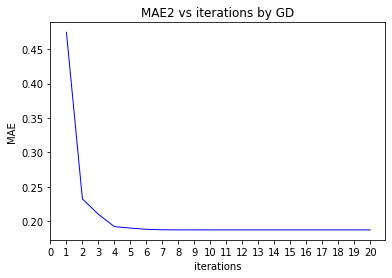

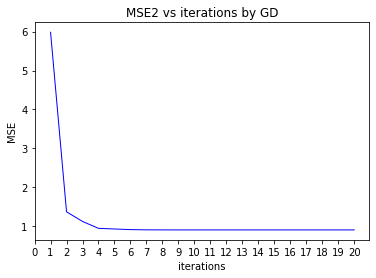

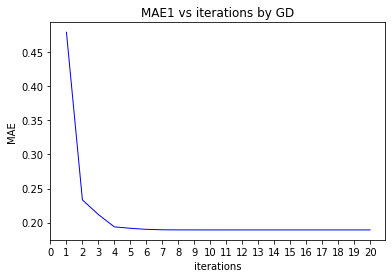

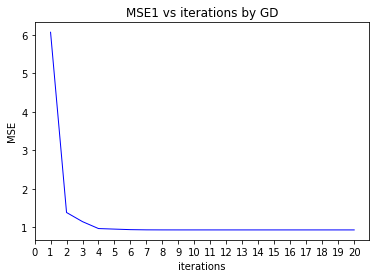

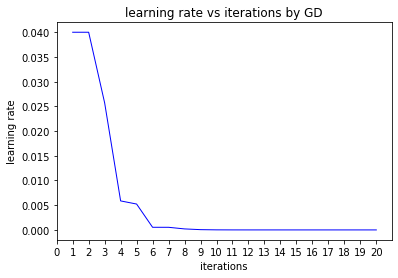

After constraining,
MAE of movielens2: 0.1779
MSE of movielens2: 0.9900
MAE of movielens1: 0.1791
MSE of movielens1: 1.0042

Set 3

Iteration: 1
learning rate: 0.040000
MAE of movielens2: 0.4795
MSE of movielens2: 6.1074
MAE of movielens1: 0.4854
MSE of movielens1: 6.1903

Iteration: 2
learning rate: 0.040000
MAE of movielens2: 0.2333
MSE of movielens2: 1.3855
MAE of movielens1: 0.2337
MSE of movielens1: 1.3838

Iteration: 3
learning rate: 0.025827

Iteration: 4
learning rate: 0.005587

Iteration: 5
learning rate: 0.005186
MAE of movielens2: 0.1918
MSE of movielens2: 0.9509
MAE of movielens1: 0.1935
MSE of movielens1: 0.9677

Iteration: 6
learning rate: 0.000477

Iteration: 7
learning rate: 0.000503

Iteration: 8
learning rate: 0.000211

Iteration: 9
learning rate: 0.000059

Iteration: 10
learning rate: 0.000015
MAE of movielens2: 0.1890
MSE of movielens2: 0.9270
MAE of movielens1: 0.1912
MSE of movielens1: 0.9464

Iteration: 11
learning rate: 0.000004

Iteration: 12
learning rate: 0.0

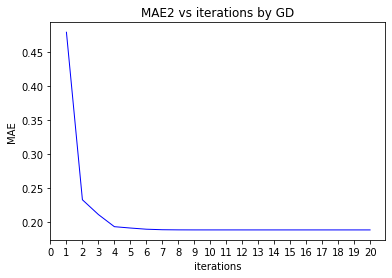

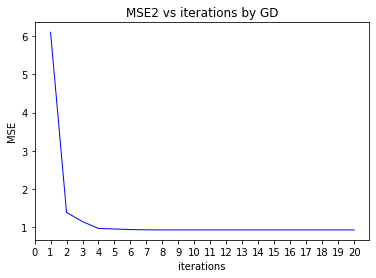

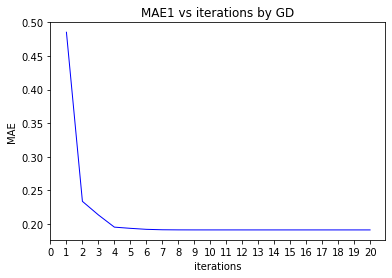

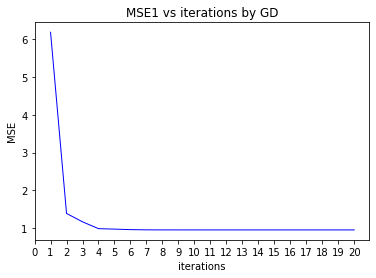

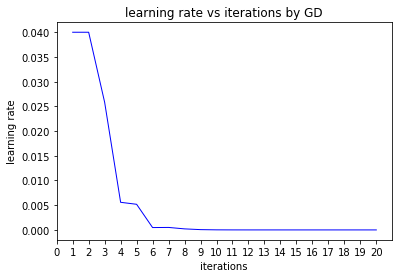

After constraining,
MAE of movielens2: 0.1796
MSE of movielens2: 1.0076
MAE of movielens1: 0.1814
MSE of movielens1: 1.0240

Set 4

Iteration: 1
learning rate: 0.040000
MAE of movielens2: 0.4802
MSE of movielens2: 6.1075
MAE of movielens1: 0.4818
MSE of movielens1: 6.0940

Iteration: 2
learning rate: 0.040000
MAE of movielens2: 0.2334
MSE of movielens2: 1.3871
MAE of movielens1: 0.2334
MSE of movielens1: 1.3808

Iteration: 3
learning rate: 0.025772

Iteration: 4
learning rate: 0.005779

Iteration: 5
learning rate: 0.005275
MAE of movielens2: 0.1923
MSE of movielens2: 0.9543
MAE of movielens1: 0.1910
MSE of movielens1: 0.9430

Iteration: 6
learning rate: 0.000495

Iteration: 7
learning rate: 0.000500

Iteration: 8
learning rate: 0.000198

Iteration: 9
learning rate: 0.000053

Iteration: 10
learning rate: 0.000012
MAE of movielens2: 0.1898
MSE of movielens2: 0.9313
MAE of movielens1: 0.1887
MSE of movielens1: 0.9226

Iteration: 11
learning rate: 0.000003

Iteration: 12
learning rate: 0.0

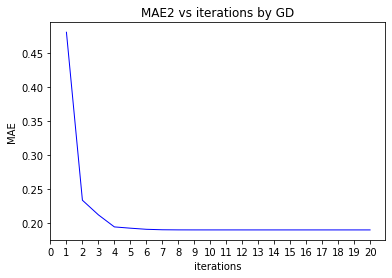

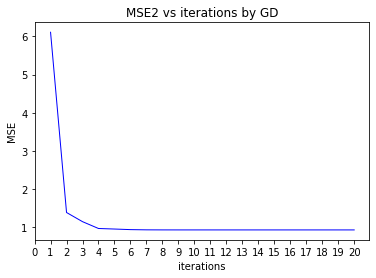

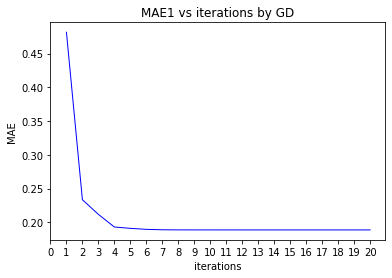

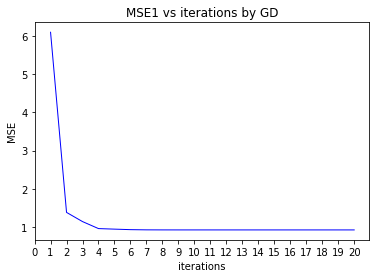

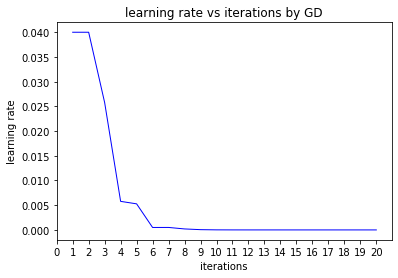

After constraining,
MAE of movielens2: 0.1804
MSE of movielens2: 1.0123
MAE of movielens1: 0.1787
MSE of movielens1: 1.0006

Set 5

Iteration: 1
learning rate: 0.040000
MAE of movielens2: 0.4757
MSE of movielens2: 6.0867
MAE of movielens1: 0.4797
MSE of movielens1: 6.1883

Iteration: 2
learning rate: 0.040000
MAE of movielens2: 0.2328
MSE of movielens2: 1.3799
MAE of movielens1: 0.2337
MSE of movielens1: 1.3856

Iteration: 3
learning rate: 0.025823

Iteration: 4
learning rate: 0.005761

Iteration: 5
learning rate: 0.005252
MAE of movielens2: 0.1912
MSE of movielens2: 0.9438
MAE of movielens1: 0.1923
MSE of movielens1: 0.9553

Iteration: 6
learning rate: 0.000485

Iteration: 7
learning rate: 0.000491

Iteration: 8
learning rate: 0.000203

Iteration: 9
learning rate: 0.000057

Iteration: 10
learning rate: 0.000014
MAE of movielens2: 0.1887
MSE of movielens2: 0.9207
MAE of movielens1: 0.1899
MSE of movielens1: 0.9349

Iteration: 11
learning rate: 0.000003

Iteration: 12
learning rate: 0.0

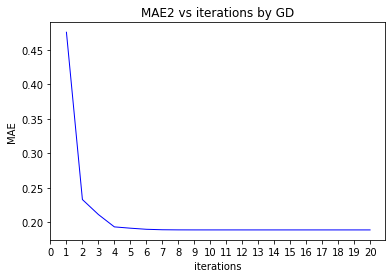

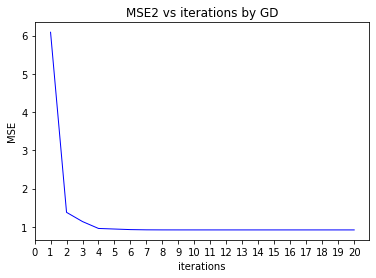

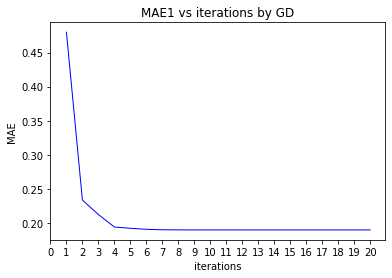

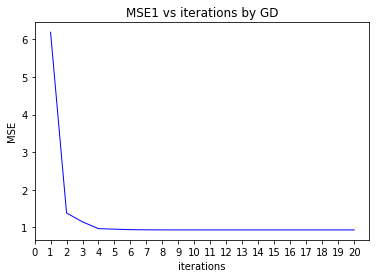

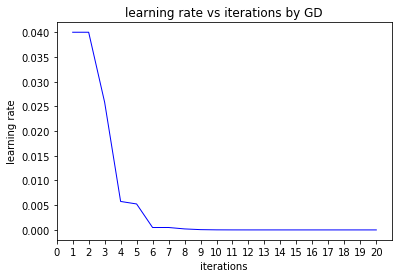

After constraining,
MAE of movielens2: 0.1787
MSE of movielens2: 0.9965
MAE of movielens1: 0.1799
MSE of movielens1: 1.0103



In [7]:
for l in range(L):
    
  print("Set %d" %(l+1))
  print()
    
  # Initialize User and Item Latents and Biases
  temp = np.random.sample((movielens.shape[0],R))
  P1 = np.copy(temp)
  Q1 = np.zeros((movielens.shape[1],R))
  P2 = np.copy(temp)
  Q2 = np.zeros((movielens.shape[1],R))
  n = 0
    
  line_iter = []
  line_mae2 = []
  line_mse2 = []
  line_mae1 = []
  line_mse1 = []
  line_learning_rate = []
    
  # Get the current start time for calculating the total time used
  start = time.time()
    
  # Complete R by using GD
  for t in range(T):
        
    if t <= 1:
      learning_rate = 0.04
    else:
      diff = ((line_mse2[t-2] - line_mse2[t-1])/ line_mse2[t-2] + (line_mse1[t-2] - line_mse1[t-1])/ line_mse1[t-2])/2
      learning_rate = diff / 30
      
    # Do the matrix completion by GD based on the non-missing entries in movielens1 and movielens2
    for i, j in zip(X1,Y1):
      predicted_entry = 0
      for r in range(R):
        predicted_entry += P1[i,r] * Q1[j,r]
      error = movielens1[i,j] - predicted_entry
      # Update User and Item Latents
      for r in range(R):
        t2 = P1[i,r]
        P1[i,r] += learning_rate * (2 * error * Q1[j,r])
        Q1[j,r] += learning_rate * (2 * error * t2)
      
    for i, j in zip(X2,Y2):
      predicted_entry = 0
      for r in range(R):
        predicted_entry += P2[i,r] * Q2[j,r]
      error = movielens2[i,j] - predicted_entry
      # Update User and Item Latents
      for r in range(R):
        t2 = P2[i,r]
        P2[i,r] += learning_rate * (2 * error * Q2[j,r])
        Q2[j,r] += learning_rate * (2 * error * t2)
      
    # calculate the MSE and MAE
    cost1 = 0
    cost2 = 0
    for x, y in zip(X2, Y2):
      predicted_entry = 0
      for r in range(R):
        predicted_entry += P1[x,r] * Q1[y,r]
      cost1 += abs(movielens2[x, y] - predicted_entry)
      cost2 += pow(movielens2[x, y] - predicted_entry,2)
    mae2 = cost1 / nz3 / 4
    mse2 = cost2 / nz3
      
    cost1 = 0
    cost2 = 0
    for x, y in zip(X1, Y1):
      predicted_entry = 0
      for r in range(R):
        predicted_entry += P2[x,r] * Q2[y,r]
      cost1 += abs(movielens1[x, y] - predicted_entry)
      cost2 += pow(movielens1[x, y] - predicted_entry,2)
    mae1 = cost1 / nz4 / 4
    mse1 = cost2 / nz4
    
    # Record the iterations done and the current MSE
    line_iter.append(t+1)
    line_mae2.append(mae2)
    line_mse2.append(mse2)
    line_mae1.append(mae1)
    line_mse1.append(mse1)
    line_learning_rate.append(learning_rate)
        
    print("Iteration: %d" %(t+1))
    print("learning rate: %f" %learning_rate)
    if (t+1) == iter_array[n]:
      print("MAE of movielens2: %.4f" %mae2)
      print("MSE of movielens2: %.4f" %mse2)
      print("MAE of movielens1: %.4f" %mae1)
      print("MSE of movielens1: %.4f" %mse1)
      n += 1
        
    print()
    
  # Get the current end time for calculating the total time used
  end = time.time()
    
  print("Time used: %f"%(end-start))
  print()
    
  # Update the predicted movielens
  predicted1 = np.zeros(movielens1.shape)
  for i in range(movielens1.shape[0]):
    for j in range(movielens1.shape[1]):
      for r in range(R):
        predicted1[i,j] += P1[i,r] * Q1[j,r]
        
  predicted2 = np.zeros(movielens2.shape)
  for i in range(movielens2.shape[0]):
    for j in range(movielens2.shape[1]):
      for r in range(R):
        predicted2[i,j] += P2[i,r] * Q2[j,r]
        
  # Save the predicted matrices in a csv file 
  np.savetxt('movielens_GD_1_%d_variable.csv' %(l+1), predicted1, delimiter=',')
  np.savetxt('movielens_GD_2_%d_variable.csv' %(l+1), predicted2, delimiter=',')
    
  # Do the constraint
  for i in range(predicted1.shape[0]):
    for j in range(predicted1.shape[1]):
      if predicted1[i,j] < 1.5:
        predicted1[i,j] = 1
      elif (predicted1[i,j] >= 1.5 and predicted1[i,j] < 5.5):
        predicted1[i,j] = int(round(predicted1[i,j]))
      else:
        predicted1[i,j] = 5
    
  for i in range(predicted2.shape[0]):
    for j in range(predicted2.shape[1]):
      if predicted2[i,j] < 1.5:
        predicted2[i,j] = 1
      elif (predicted2[i,j] >= 1.5 and predicted2[i,j] < 5.5):
        predicted2[i,j] = int(round(predicted2[i,j]))
      else:
        predicted2[i,j] = 5
    
  plt.plot(line_iter, line_mae2, color='blue', lw='1')
  plt.xlabel('iterations')  
  plt.ylabel('MAE')
  plt.xticks(np.arange(0, T+1, 1))
  plt.title("MAE2 vs iterations by GD")
  plt.show()
    
  plt.plot(line_iter, line_mse2, color='blue', lw='1')
  plt.xlabel('iterations')  
  plt.ylabel('MSE')
  plt.xticks(np.arange(0, T+1, 1))
  plt.title("MSE2 vs iterations by GD")
  plt.show()
    
  plt.plot(line_iter, line_mae1, color='blue', lw='1')
  plt.xlabel('iterations')  
  plt.ylabel('MAE')
  plt.xticks(np.arange(0, T+1, 1))
  plt.title("MAE1 vs iterations by GD")
  plt.show()
    
  plt.plot(line_iter, line_mse1, color='blue', lw='1')
  plt.xlabel('iterations')  
  plt.ylabel('MSE')
  plt.xticks(np.arange(0, T+1, 1))
  plt.title("MSE1 vs iterations by GD")
  plt.show()
    
  plt.plot(line_iter, line_learning_rate, color='blue', lw='1')
  plt.xlabel('iterations')  
  plt.ylabel('learning rate')
  plt.xticks(np.arange(0, T+1, 1))
  plt.title("learning rate vs iterations by GD")
  plt.show()
    
  cost1 = 0
  cost2 = 0
  for x, y in zip(X2, Y2):
    cost1 += abs(movielens2[x, y] - predicted1[x, y])
    cost2 += pow(movielens2[x, y] - predicted1[x, y],2)
  mae2 = cost1 / nz3 / 4
  mse2 = cost2 / nz3
      
  cost1 = 0
  cost2 = 0
  for x, y in zip(X1, Y1):
    cost1 += abs(movielens1[x, y] - predicted2[x, y])
    cost2 += pow(movielens1[x, y] - predicted2[x, y],2)
  mae1 = cost1 / nz4 / 4
  mse1 = cost2 / nz4
    
  print("After constraining,")
  print("MAE of movielens2: %.4f" %mae2)  
  print("MSE of movielens2: %.4f" %mse2)
  print("MAE of movielens1: %.4f" %mae1)
  print("MSE of movielens1: %.4f" %mse1)
  print()
    
  np.savetxt('movielens_GD_constraint_1_%d_variable.csv' %(l+1), predicted1, delimiter=',')
  np.savetxt('movielens_GD_constraint_2_%d_variable.csv' %(l+1), predicted2, delimiter=',')